[7975.69727427   17.48517947]
El ECM es: 8.953942751950354
La ganancia estimada para 35000 habitantes es: 0.2798368763517103


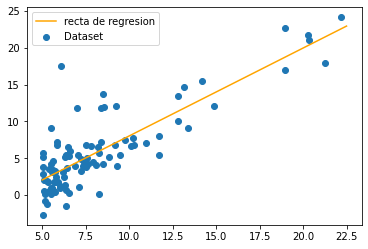

In [ ]:
#primer problema con regresion lineal
import numpy as np
import matplotlib.pyplot as plt
from urllib import request
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/mc.txt"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")

def recta_regresion(a,b,x):
  y = a*x+b
  return y

x= dataset[:,0]
#x_t = x.reshape(len(dataset),1)
y = dataset[:,1]
largo = len(dataset)
plt.scatter(x,y,label='Dataset')

a = []
for n in range(largo):
  a.append([x[n],1]) #tiene una columna de unos y otro de los valores de x
w = np.linalg.inv(np.transpose(a)@a)@np.transpose(a)@y #de aca sale w[0] = w y w[1] = b

y_res = []

absisa = np.linspace(5, 22.5, num=100)
plt.plot(absisa, absisa*w[0]+w[1], color='orange',label='recta de regresion')

plt.legend()

#error cuadratico medio ECM = ||y-a*x||^2
y_predictor = []
for i in np.arange(largo):
  y_predictor.append(w[0]*x[i]+w[1])
ECM = 0
for j in range(largo):
  ECM = ECM + (y_predictor[j]-y[j])*(y_predictor[j]-y[j])

ECM = ECM/largo
autovalores = np.linalg.eigvals(np.transpose(a)@a)
print(autovalores)

print("El ECM es:", ECM)

print("La ganancia estimada para 35000 habitantes es:", recta_regresion(w[0],w[1],3.5))


In [ ]:
#primer problema con tf
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from urllib import request
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/mc.txt"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")

x_datos= dataset[:,0]
y_datos = dataset[:,1]

largo = len(dataset)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))
model.summary()
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.003), loss='MeanSquaredError') #configura el tipo de entrenamiento de este modelo, cuando llamo al optimizador = 'keras.optimizers.SGD'es por que estoy usando el desenso del gradiente
#el learning date determina que tan grande es el paso del desenso del gradiente
hist = model.fit(x= x_datos, y= y_datos, batch_size =largo, epochs=100000, callbacks=[es] ) #entrenas el modelo
#hist = model.fit(x='arrays de x', y= 'arrays de y', batch_size =  # de muestras de entrenamiento, epochs=100000 (iteraciones por cada decenso),callbacks=[es] (determina que deje de entrenar cuando la metrica que mido deja de mejorar))
losses = np.array(hist.history['loss'])
param = model.get_weights()
prediction = model.predict(x=np.array([3.5]))
print("La ganacia estimada para 35000 habitantes es:", prediction)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 6ms/step - loss: 9.1697
Epoch 1179/100000
1/1 [==============================] - 0s 9ms/step - loss: 9.1692
Epoch 1180/100000
1/1 [==============================] - 0s 6ms/step - loss: 9.1688
Epoch 1181/100000
1/1 [==============================] - 0s 8ms/step - loss: 9.1683
Epoch 1182/100000
1/1 [==============================] - 0s 6ms/step - loss: 9.1678
Epoch 1183/100000
1/1 [==============================] - 0s 7ms/step - loss: 9.1674
Epoch 1184/100000
1/1 [==============================] - 0s 6ms/step - loss: 9.1669
Epoch 1185/100000
1/1 [==============================] - 0s 6ms/step - loss: 9.1665
Epoch 1186/100000
1/1 [==============================] - 0s 6ms/step - loss: 9.1660
Epoch 1187/100000
1/1 [==============================] - 0s 6ms/step - loss: 9.1655
Epoch 1188/100000
1/1 [==============================] - 0s 6ms/step - loss: 9.1651
Epoch 1189/100000
1/1 [==========

[array([[1.1857234]], dtype=float32), array([-3.8230145], dtype=float32)]
0.01213534165664063


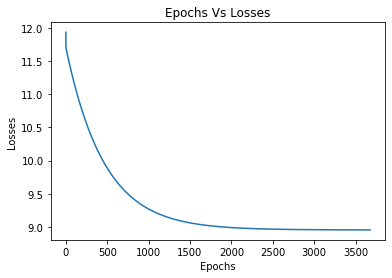

In [ ]:
#epochs = np.linspace(1,2858,2858)
plt.plot( losses)
plt.title("Epochs Vs Losses")
plt.xlabel("Epochs")
plt.ylabel("Losses")
print(param)
lr_optimo = largo/(autovalores[0] + autovalores[1])
print(lr_optimo)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 7ms/step - loss: 4853074432.0000
Epoch 4160/100000
1/1 [==============================] - 0s 6ms/step - loss: 4852968960.0000
Epoch 4161/100000
1/1 [==============================] - 0s 6ms/step - loss: 4852862464.0000
Epoch 4162/100000
1/1 [==============================] - 0s 6ms/step - loss: 4852756992.0000
Epoch 4163/100000
1/1 [==============================] - 0s 6ms/step - loss: 4852652032.0000
Epoch 4164/100000
1/1 [==============================] - 0s 7ms/step - loss: 4852547072.0000
Epoch 4165/100000
1/1 [==============================] - 0s 8ms/step - loss: 4852441600.0000
Epoch 4166/100000
1/1 [==============================] - 0s 6ms/step - loss: 4852336640.0000
Epoch 4167/100000
1/1 [==============================] - 0s 7ms/step - loss: 4852232704.0000
Epoch 4168/100000
1/1 [==============================] - 0s 12ms/step - loss: 4852127744.0000
Epoch 4169/100000
1/1 [===

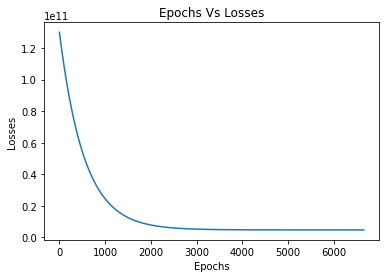

In [ ]:
#segundo problema con tf
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from urllib import request

#obtencion de datos
example2_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/inmobiliaria.txt" 
f = request.urlopen(example2_url) 
dataset2 = np.loadtxt(f, dtype=float, delimiter=",")

superficie = np.array(dataset2[:,:2]) 
precio = np.array(dataset2[:,2]) 
cant_datos = np.size(precio)

#seteo y entrenamiento del modelo
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(1, input_dim=2)) 
model.summary() 
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1) 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-10), loss='MeanSquaredError') 
hist = model.fit(x= superficie, y= precio, batch_size = cant_datos, epochs=100000, callbacks=[es])

#resultados
losses = np.array(hist.history['loss']) 
param = model.get_weights()

#prediccion
a = np.array([1650,3]).reshape(1,2)
prediction = model.predict(x=a)

#ploteo
plt.plot( losses) 
plt.title("Epochs Vs Losses") 
plt.xlabel("Epochs") 
plt.ylabel("Losses") 
print(param)
print(prediction)